# Lesson 7: Data Ingest & Visualization -- Matplotlib & Pandas

These are some notes for [Data Carpentry](http://www.datacarpentry.org)'s tutorial [*Data Analysis and Visualization in Python*](http://www.datacarpentry.org/python-ecology-lesson/).  The web page for this lesson can be found [here](http://www.datacarpentry.org/python-ecology-lesson/07-putting-it-all-together).

## Goal

> Analyze **real** data with the techniques learned in the series

## Download Data

Let's use some real data:

* 15 15-minute intervals (in cubic feet per second) for a streamgage on Boulder Creek at North 75th Street (USGS gage06730200) for 1-30 September 2013,
* available [here](http://www.datacarpentry.org/python-ecology-lesson/data/bouldercreek_09_2013.txt).

## Open & Clean Up Data

**Open** the file.  If it **fails**, check that you

* remove any **initial comments**,
* use the correct **delimiter**:
    * `','` for comma
    * `' '` for space
    * `'\t'` for tab.

Keep only the **columns you want**:

* data
* time
* discharge measurements
    * scale measurements to **SI units**.

Change **column names** to something useful.  The **method** is **like this**:

In [2]:
import pandas as pd

In [3]:
# this just creates a DataFrame for the example!
df = pd.DataFrame({'1stcolumn':[100,200], '2ndcolumn':[10,20]})

# the \n makes a new line, so it's easier to see
print('With the old column names:\n')
print(df)

With the old column names:

   1stcolumn  2ndcolumn
0        100         10
1        200         20


In [4]:
# rename the columns!
df.columns = ['FirstColumn','SecondColumn']
print('\n\nWith the new column names:\n')
print(df)



With the new column names:

   FirstColumn  SecondColumn
0          100            10
1          200            20


## Plot the Data

Make a plot of the data using `matplotlib.pyplot`.

### Exercise

Make a variety of line plots from your data. If you are using the streamgage data, these could include

1. a hydrograph of the entire month of September 2013,
2. the discharge record for the week of the 2013 Front Range flood (September 9 through 15),
3. discharge vs. time of day, for every day in the record in one figure (Hint: use loops to combine strings and give every line a different style and color), and
4. minimum, maximum, and mean daily discharge values. Add axis labels, titles, and legends to your figures. Make at least one figure with multiple plots using the function `subplot()`.

### Basics of `pyplot`

Import the toolkit.

In [5]:
import matplotlib.pyplot as plt

Use IPython **magic** to get the plots to **show inline automatically**.

In [6]:
%matplotlib inline

Plot a simple list of numbers.

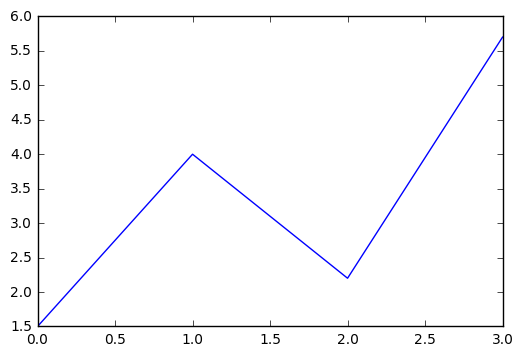

In [7]:
list_numbers = [1.5, 4, 2.2, 5.7]
plt.plot(list_numbers)
plt.show()

If you don't use `plt.show()`, the object is **created in memory** but there is **no display**.

The **arguments of `plot()`**:

* **one** argument:
    * assumed **`y`-values**,
    * plotted against **index**;
* **two** arguments:
    * first assumed **`x`-values**,
    * second assumed **`y`-values**,
    * lines connected in **order of list entries**;
* **optional** argument:
    * line **type** & **color**;
* **repeat** arguments for **more lines**.

The **arguments of `axis()`**:

* one **list**:
    * `[x_min, x_max, y_min, y_max]`.

Add **labels**:

* **`x`**-axis: `xlabel()`;
* **`y`**-axis: `ylabel()`;
* **title**: `title()`.

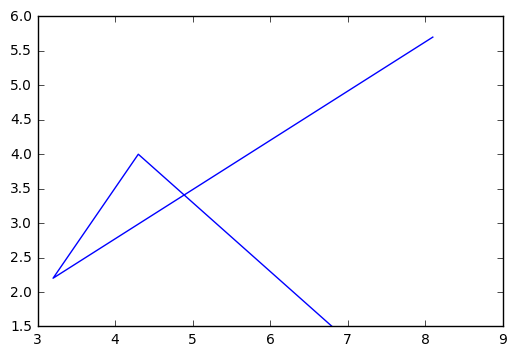

In [8]:
plt.plot([6.8, 4.3, 3.2, 8.1], list_numbers)
plt.show()

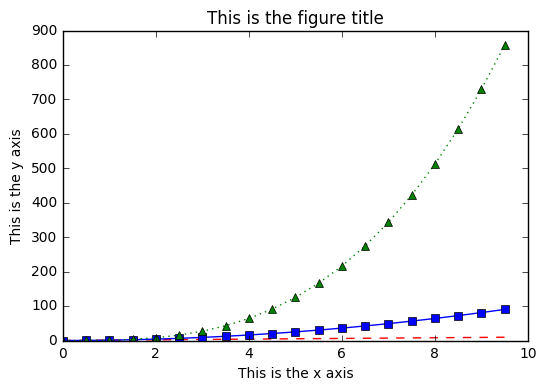

In [9]:
import numpy as np

# create a numpy array between 0 and 10, with values evenly spaced every 0.5
t = np.arange(0., 10., 0.5)

# red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', t, t**2, 'bs-', t, t**3, 'g^:')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()

Use **labels** to create a **legend**.

But you need an **individual `plot()` command** for **each label**.

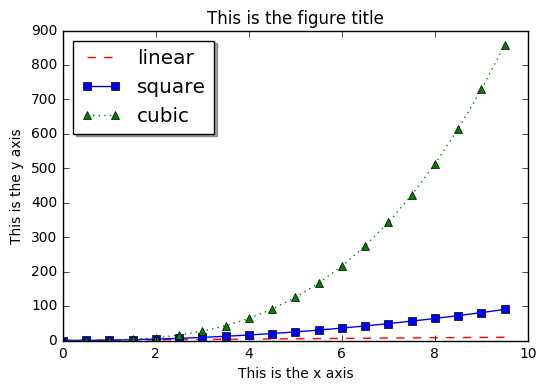

In [10]:
# red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', label='linear')
plt.plot(t, t**2, 'bs-', label='square')
plt.plot(t, t**3, 'g^:', label='cubic')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()

To make several **figures**, use the `figure()` command and **increase the figure number** each time.

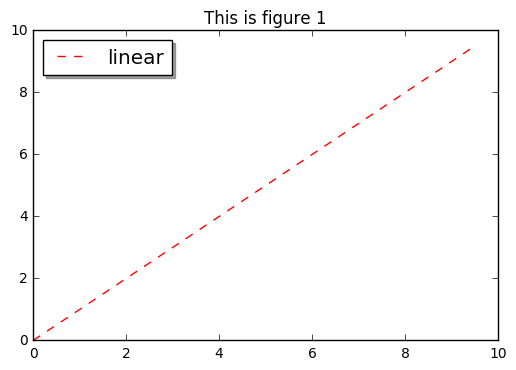

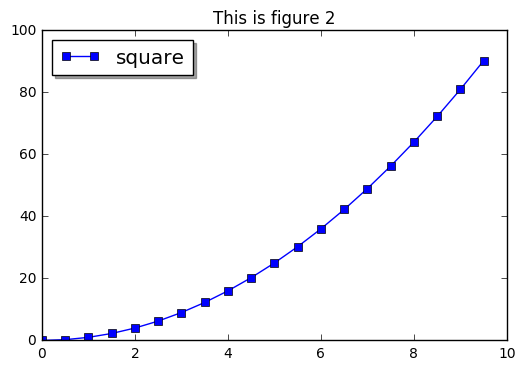

In [11]:
# this is the first figure
plt.figure(1)
plt.plot(t, t, 'r--', label='linear')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('This is figure 1')

plt.show()

# this is a second figure
plt.figure(2)
plt.plot(t, t**2, 'bs-', label='square')

plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.title('This is figure 2')

plt.show()

Place **multiple plots** in a **grid** in a **single figure**.

Use the **`subplot()` command**, where the

* 1st argument: number of **rows**;
* 2nd argument: number of **columns**;
* 3rd argument: the **space** in the **grid** of the **current plot**.

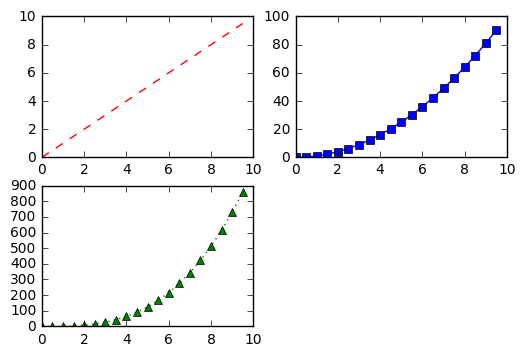

In [12]:
plt.figure(1)

plt.subplot(2,2,1) # two row, two columns, position 1
plt.plot(t, t, 'r--', label='linear')

plt.subplot(2,2,2) # two row, two columns, position 2
plt.plot(t, t**2, 'bs-', label='square')

plt.subplot(2,2,3) # two row, two columns, position 3
plt.plot(t, t**3, 'g^:', label='cubic')

plt.show()

## Make Other Plots

Get ideas from the [screenshots here](http://matplotlib.org/users/screenshots.html) of plots other `matplotlib` users have created.

### Exercise

Display your data using one or more plot types from the example gallery. Which ones to choose will depend on the content of your own data file. If you are using the streamgage file, you could make a histogram of the number of days with a given mean discharge, use bar plots to display daily discharge statistics, or explore the different ways `matplotlib` can handle dates and times for figures.